In [1]:
import pandas as pd

data=pd.read_csv(r"C:\Users\LENOVO\Downloads\Salary_Data.csv")

In [2]:
data.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [3]:
data.shape

(6704, 6)

In [4]:
data.isnull().sum()

Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
dtype: int64

In [5]:
data.dropna(inplace=True)


In [6]:
data.isnull().sum()

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64

In [7]:
data.describe()

,Age,Years of Experience,Salary
count,6698.000000,6698.000000,6698.000000
mean,33.623022,8.095178,115329.253061
std,7.615784,6.060291,52789.792507
min,21.000000,0.000000,350.000000
25%,28.000000,3.000000,70000.000000
50%,32.000000,7.000000,115000.000000
75%,38.000000,12.000000,160000.000000
max,62.000000,34.000000,250000.000000


In [8]:
data.columns


Index(['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience',
       'Salary'],
      dtype='object')

In [9]:
cols=['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience',
       'Salary']
for i in cols:
    print(data[i].value_counts())

Age
27.0    516
30.0    449
29.0    444
28.0    429
33.0    398
26.0    393
31.0    364
32.0    351
34.0    309
25.0    284
36.0    281
24.0    240
35.0    200
42.0    176
43.0    158
39.0    158
37.0    156
38.0    149
45.0    144
41.0    129
44.0    126
23.0    104
46.0    102
48.0     98
40.0     92
49.0     91
50.0     88
54.0     68
47.0     47
51.0     30
52.0     29
21.0     18
55.0     16
22.0     15
56.0     11
57.0      9
53.0      7
58.0      7
62.0      5
60.0      5
61.0      2
Name: count, dtype: int64
Gender
Male      3671
Female    3013
Other       14
Name: count, dtype: int64
Education Level
Bachelor's Degree    2265
Master's Degree      1572
PhD                  1368
Bachelor's            756
High School           448
Master's              288
phD                     1
Name: count, dtype: int64
Job Title
Software Engineer             518
Data Scientist                453
Software Engineer Manager     376
Data Analyst                  363
Senior Project Engineer       

In [10]:
len(data['Job Title'].value_counts())

191

In [11]:
# Filter job titles with more than 50 occurrences
job_counts = data['Job Title'].value_counts()
frequent_jobs = job_counts[job_counts > 50].index

# Filter the dataset for rows with these job titles
filtered_data = data[data['Job Title'].isin(frequent_jobs)]


filtered_data.shape

(5846, 6)

In [12]:

len(filtered_data['Job Title'].value_counts())

38

In [13]:
from sklearn.preprocessing import LabelEncoder

# Columns to encode
columns_to_encode = ['Gender', 'Education Level', 'Job Title']

# Initialize LabelEncoder
label_encoders = {}

# Apply label encoding to each column
for column in columns_to_encode:
    label_encoders[column] = LabelEncoder()
    filtered_data[column] = label_encoders[column].fit_transform(filtered_data[column])



C:\Users\LENOVO\AppData\Local\Temp\ipykernel_81904\1612052897.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data[column] = label_encoders[column].fit_transform(filtered_data[column])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_81904\1612052897.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data[column] = label_encoders[column].fit_transform(filtered_data[column])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_81904\1612052897.py:12: SettingWithCopyWarning: 
A value is trying to

In [14]:

filtered_data.head()


,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,1,0,35,5.0,90000.0
1,28.0,0,3,2,3.0,65000.0
3,36.0,0,0,27,7.0,60000.0
5,29.0,1,0,17,2.0,55000.0
6,42.0,0,3,23,12.0,120000.0


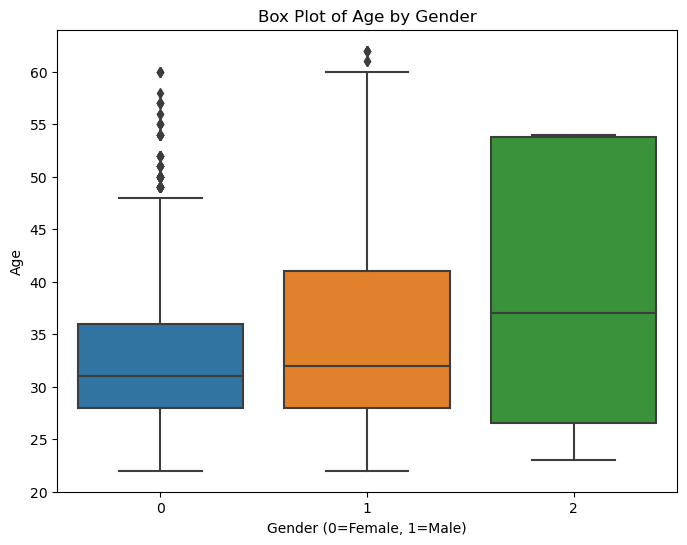

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot for Age by Gender
plt.figure(figsize=(8, 6))
sns.boxplot(data=filtered_data, x='Gender', y='Age')
plt.title('Box Plot of Age by Gender')
plt.xlabel('Gender (0=Female, 1=Male)')
plt.ylabel('Age')
plt.show()



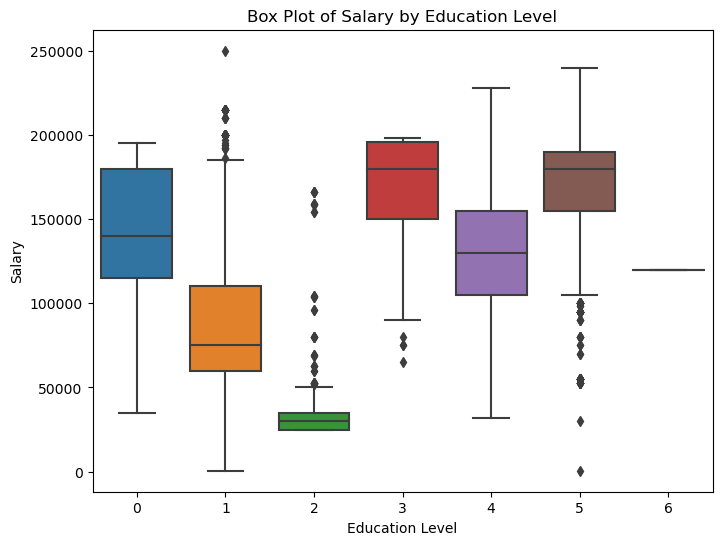

In [16]:
# Boxplot for Salary by Education Level
plt.figure(figsize=(8, 6))
sns.boxplot(data=filtered_data, x='Education Level', y='Salary')
plt.title('Box Plot of Salary by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Salary')
plt.show()



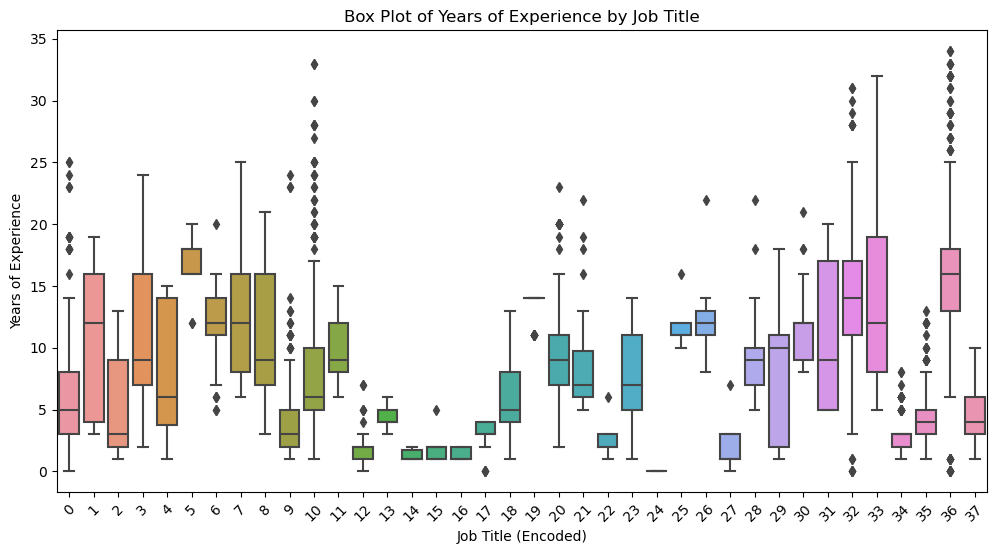

In [17]:
# Boxplot for Years of Experience by Job Title
plt.figure(figsize=(12, 6))
sns.boxplot(data=filtered_data, x='Job Title', y='Years of Experience')
plt.title('Box Plot of Years of Experience by Job Title')
plt.xlabel('Job Title (Encoded)')
plt.ylabel('Years of Experience')
plt.xticks(rotation=45)  # Rotate job titles for better readability
plt.show()


In [18]:
X = filtered_data.drop(columns=['Salary'])

# Target (y): 'Salary'
y = filtered_data['Salary']

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Print shapes to confirm
print("X_train_scaled shape:", X_train_scaled.shape)
print("X_test_scaled shape:", X_test_scaled.shape)


X_train_scaled shape: (4676, 5)
X_test_scaled shape: (1170, 5)


In [20]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Define the model
gbr = GradientBoostingRegressor()

# Define parameter grid for tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10]
}

# Perform Grid Search
grid_search = GridSearchCV(estimator=gbr, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', verbose=2)
grid_search.fit(X_train_scaled, y_train)

# Best model after tuning
best_gbr = grid_search.best_estimator_

# Predict on test data
y_pred = best_gbr.predict(X_test_scaled)

# Model evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Best Parameters:", grid_search.best_params_)
print("Mean Squared Error (MSE):", mse)
print("R^2 Score:", r2)


Fitting 3 folds for each of 81 candidates, totalling 243 fits
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=200; total time=   0.7s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=200; total time=   0.9s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=200; total time=   0.9s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=300; total time=   1.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=300; total time=   1.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=300; total time=   1.1s
[CV] END learning_rate=0.01, max_depth

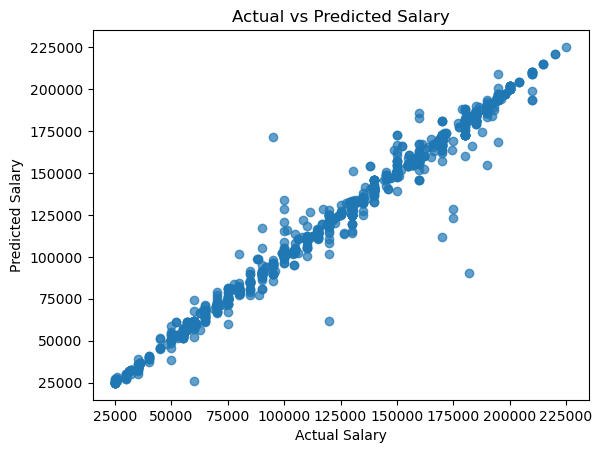

In [21]:
import matplotlib.pyplot as plt

# Plot actual vs predicted
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Actual vs Predicted Salary")
plt.show()
